In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#change to your local file path
df = pd.read_csv("/Users/nayeonkim/Downloads/data.csv", low_memory=False)

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [5]:
df.isna().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

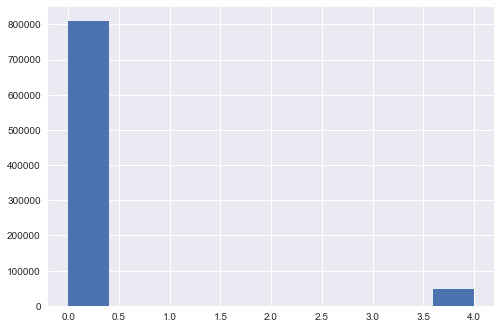

In [6]:
plt.style.use('seaborn')
pd.cut(df['default_ind'], bins=5, labels=False).hist()
plt.show()

In [7]:
df = df.drop(columns=['sub_grade', 'loan_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'], axis=1)

In [8]:
df = df.drop(columns=['member_id'], axis=1)

In [9]:
df = df.drop(columns=['emp_length', 'desc', 'emp_title', 'zip_code'], axis=1)

In [10]:
df

,id,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,5000,36 months,10.65,162.87,B,RENT,24000.0,Verified,01-12-2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,2500,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,01-12-2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,2400,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,01-12-2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,10000,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,01-12-2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,3000,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,01-12-2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,10000,36 months,11.99,332.10,B,RENT,31000.0,Verified,01-01-2015,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,24000,36 months,11.99,797.03,B,MORTGAGE,79000.0,Verified,01-01-2015,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,13000,60 months,15.99,316.07,D,RENT,35000.0,Verified,01-01-2015,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,12000,60 months,19.99,317.86,E,RENT,64400.0,Source Verified,01-01-2015,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0


In [10]:
df['id'].dtypes

dtype('int64')

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
df1 = df.loc[:, df.columns != "default_ind"]
df2 = df1.loc[:, df1.columns != "id"]
df_numerics_only = df2.select_dtypes(include=np.number)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

num_transformed = num_pipeline.fit_transform(df_numerics_only)

In [12]:
num_transformed

array([[-1.15593762e+00, -5.81984560e-01, -1.12161710e+00, ...,
         9.88964671e-15,  3.30330006e-15,  8.38667283e-15],
       [-1.45286854e+00,  4.75619945e-01, -1.54438566e+00, ...,
         9.88964671e-15,  3.30330006e-15,  8.38667283e-15],
       [-1.46474577e+00,  6.33573865e-01, -1.44386324e+00, ...,
         9.88964671e-15,  3.30330006e-15,  8.38667283e-15],
       ...,
       [-2.05758673e-01,  6.40441427e-01, -4.93044279e-01, ...,
         9.88964671e-15,  3.30330006e-15,  8.38667283e-15],
       [-3.24531041e-01,  1.55611632e+00, -4.85699989e-01, ...,
         9.88964671e-15,  3.30330006e-15,  8.38667283e-15],
       [ 6.25647902e-01, -2.75233470e-01,  9.35317700e-01, ...,
         9.88964671e-15,  3.30330006e-15,  8.38667283e-15]])

In [13]:
df_non_numeric = df2.select_dtypes('object')

obj_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

obj_transformed = obj_pipeline.fit_transform(df_non_numeric)

In [14]:
from sklearn.compose import ColumnTransformer

num_vars = []
cat_vars = []

for col in df2.columns:
  if df2[col].dtypes is np.number:
    num_vars.append(col)
  else:
    cat_vars.append(col)

data_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_vars),
    ('categorical', obj_pipeline, cat_vars)
])

df_processed = data_pipeline.fit_transform(df2)

In [15]:
df_processed = pd.DataFrame(df_processed, columns=df2.columns)

In [16]:
df_processed.sample(10)

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
108332,687.0,1.0,496.0,38536.0,5.0,1.0,40694.0,2.0,55.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,3516.0,0.0,0.0,2.0
209223,127.0,0.0,443.0,7874.0,4.0,5.0,8091.0,0.0,45.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,2484.0,0.0,0.0,2.0
104898,367.0,0.0,100.0,22104.0,1.0,5.0,8091.0,0.0,64.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,5074.0,0.0,0.0,2.0
321267,287.0,0.0,158.0,17047.0,1.0,1.0,45211.0,0.0,65.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,652.0,0.0,0.0,2.0
625593,247.0,0.0,190.0,14510.0,2.0,5.0,14338.0,2.0,66.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,1546.0,0.0,0.0,2.0
402777,218.0,0.0,203.0,12662.0,2.0,5.0,17497.0,1.0,30.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,1773.0,0.0,0.0,2.0
804896,447.0,1.0,190.0,17684.0,2.0,1.0,20490.0,1.0,15.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,4795.0,0.0,0.0,2.0
556251,287.0,0.0,43.0,15663.0,1.0,1.0,38499.0,1.0,84.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,8403.0,0.0,0.0,2.0
727508,200.0,0.0,190.0,11407.0,2.0,4.0,8091.0,1.0,39.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,2652.0,0.0,0.0,2.0
382311,327.0,0.0,461.0,23845.0,4.0,1.0,44094.0,2.0,38.0,0.0,...,0.0,949.0,0.0,1.0,0.0,568.0,4405.0,0.0,0.0,2.0


In [17]:
df['id']

0          1077501
1          1077430
2          1077175
3          1076863
4          1075358
            ...   
855964    36371250
855965    36441262
855966    36271333
855967    36490806
855968    36271262
Name: id, Length: 855969, dtype: int64

In [18]:
df['default_ind']

0         0
1         1
2         0
3         0
4         0
         ..
855964    0
855965    0
855966    0
855967    0
855968    0
Name: default_ind, Length: 855969, dtype: int64

In [19]:
df_processed['id'] = df['id']

In [20]:
df_processed['default_ind'] = df['default_ind']

In [21]:
df_processed

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,id,default_ind
0,167.0,0.0,101.0,8723.0,1.0,5.0,3120.0,2.0,98.0,0.0,...,0.0,1.0,0.0,568.0,2484.0,0.0,0.0,2.0,1077501,0
1,67.0,1.0,273.0,1565.0,2.0,5.0,5579.0,1.0,98.0,0.0,...,0.0,1.0,0.0,568.0,2484.0,0.0,0.0,2.0,1077430,1
2,63.0,0.0,296.0,3098.0,2.0,5.0,410.0,0.0,98.0,0.0,...,0.0,1.0,0.0,568.0,2484.0,0.0,0.0,2.0,1077175,0
3,367.0,0.0,197.0,23285.0,2.0,5.0,16788.0,1.0,98.0,0.0,...,0.0,1.0,0.0,568.0,2484.0,0.0,0.0,2.0,1076863,0
4,87.0,1.0,166.0,2049.0,1.0,5.0,33015.0,1.0,98.0,0.0,...,0.0,1.0,0.0,568.0,2484.0,0.0,0.0,2.0,1075358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,367.0,0.0,142.0,22657.0,1.0,5.0,6038.0,2.0,7.0,0.0,...,0.0,1.0,0.0,568.0,3078.0,0.0,0.0,2.0,36371250,0
855965,927.0,0.0,142.0,56733.0,1.0,1.0,32634.0,2.0,7.0,0.0,...,0.0,1.0,0.0,568.0,1235.0,0.0,0.0,2.0,36441262,0
855966,487.0,1.0,297.0,21272.0,3.0,5.0,8091.0,2.0,7.0,0.0,...,0.0,1.0,0.0,568.0,3333.0,0.0,0.0,2.0,36271333,0
855967,447.0,1.0,410.0,21432.0,4.0,5.0,25790.0,1.0,7.0,0.0,...,0.0,1.0,0.0,568.0,5967.0,0.0,0.0,2.0,36490806,0


Data Visualization

Organization of data on grade

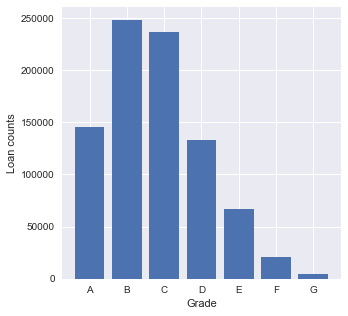

In [22]:
grades = df['grade']
grade_counts = grades.value_counts()
sorted_grades = grade_counts.sort_index()

plt.figure(figsize=(5,5))
plt.bar(sorted_grades.index, sorted_grades)
plt.xlabel('Grade')
plt.ylabel('Loan counts')

plt.show()

Organization of data on borrowing purposes

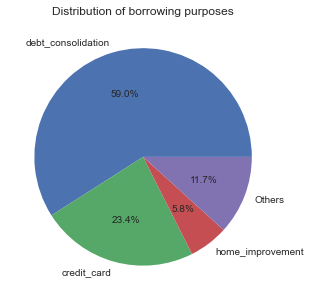

In [23]:
purposes = df['purpose']
purpose_count = df['purpose'].value_counts()
threshold = 0.05 # %5

others = purpose_count[purpose_count / purpose_count.sum() < threshold]
others_count = others.sum()
purpose_count = purpose_count.drop(others.index)
purpose_count['Others'] = others_count


plt.figure(figsize=(5,5))
plt.pie(purpose_count,labels=purpose_count.index, autopct='%1.1f%%')
plt.title('Distribution of borrowing purposes')


plt.show()

<AxesSubplot:>

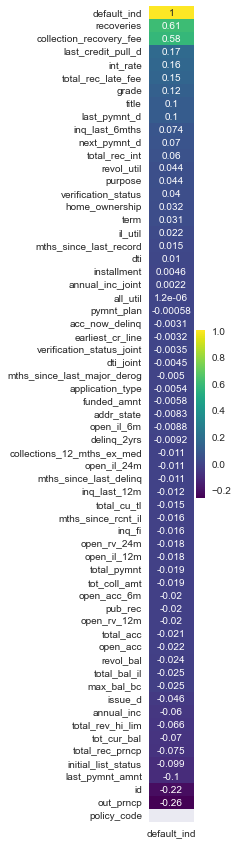

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

coor_matrix = df_processed.corr()["default_ind"].sort_values(ascending=False)

plt.figure(figsize=(1,15))
sns.heatmap(coor_matrix.to_frame(), annot=True, cmap='viridis')

Distribution of recoveries and collection recovery fees on default

<AxesSubplot:title={'center':'Mean of recovery and collection fees'}, xlabel='Default', ylabel='Mean'>

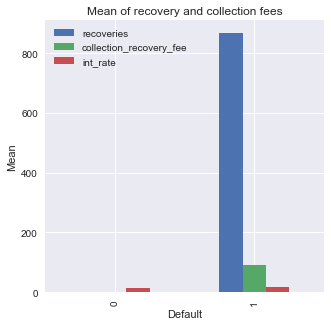

In [26]:
df3 = df[['default_ind','recoveries','collection_recovery_fee', 'int_rate']].groupby('default_ind').mean()

df3.plot(kind='bar', figsize=(5,5), xlabel='Default', ylabel='Mean', title='Mean of recovery and collection fees')

Interest Rate Info

count    855969.000000
mean         13.192320
std           4.368365
min           5.320000
25%           9.990000
50%          12.990000
75%          15.990000
max          28.990000
Name: int_rate, dtype: float64


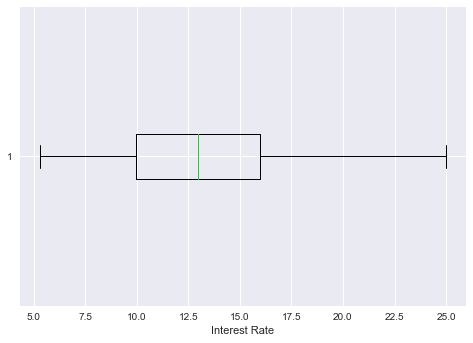

In [25]:
print(df['int_rate'].describe())

plt.boxplot(df['int_rate'], showfliers=False, meanline=True, vert=False)
plt.xlabel('Interest Rate')
plt.show()

In [27]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = df_processed.loc[:, df_processed.columns!="default_ind"]
y = df_processed.loc[:, "default_ind"]

reduce the size of dataset, trying to keep it stratified

In [28]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, train_size=0.33, stratify=y)

df = pd.concat([X_train, y_train], axis=1)

In [29]:
df

,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,id,default_ind
637964,167.0,0.0,110.0,8786.0,1.0,5.0,29585.0,1.0,66.0,0.0,...,0.0,1.0,0.0,568.0,2938.0,0.0,0.0,2.0,56011625,0
16240,676.0,1.0,274.0,30518.0,3.0,1.0,33015.0,1.0,35.0,0.0,...,0.0,1.0,0.0,568.0,2484.0,0.0,0.0,2.0,721464,0
743359,1367.0,0.0,17.0,65301.0,0.0,1.0,44094.0,2.0,31.0,0.0,...,0.0,1.0,0.0,568.0,10090.0,0.0,0.0,2.0,46754576,0
712079,837.0,1.0,513.0,48800.0,6.0,5.0,27621.0,2.0,39.0,0.0,...,0.0,1.0,0.0,568.0,7333.0,0.0,0.0,2.0,50034528,0
820414,567.0,0.0,6.0,33151.0,0.0,1.0,33015.0,1.0,15.0,0.0,...,0.0,1.0,0.0,568.0,8280.0,0.0,0.0,2.0,40480551,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,247.0,0.0,142.0,14157.0,1.0,1.0,19893.0,1.0,91.0,0.0,...,0.0,1.0,0.0,568.0,8205.0,0.0,0.0,2.0,8295777,0
120052,327.0,0.0,115.0,19459.0,1.0,5.0,7016.0,1.0,46.0,0.0,...,0.0,1.0,0.0,568.0,4149.0,0.0,0.0,2.0,5755695,1
433099,1367.0,0.0,171.0,66611.0,1.0,4.0,40894.0,2.0,14.0,0.0,...,0.0,1.0,0.0,568.0,8947.0,0.0,0.0,2.0,11695351,0
185790,743.0,1.0,403.0,37595.0,3.0,1.0,35194.0,2.0,81.0,0.0,...,0.0,1.0,0.0,568.0,4737.0,0.0,0.0,2.0,1605501,0


In [32]:
df['default_ind'].value_counts()

0    267135
1     15334
Name: default_ind, dtype: int64

In [33]:
X = df.loc[:, df_processed.columns!="default_ind"]
y = df.loc[:, "default_ind"]

In [34]:
from sklearn.model_selection import StratifiedKFold

In [35]:
skf = StratifiedKFold()
skf.get_n_splits(X, y)

5

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9977


The accuracy is way too high - validate with cross validation again

In [35]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=0)
cvs = cross_val_score(rf, X, y, scoring=None, cv=skf)

In [36]:
np.mean(cvs)

0.9978510916491723

In [38]:
print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9977


### Fine tune the model with GridSearchCV

this is taking forever 

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [6,7,8]
}
rfc = RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

computed via cross validation

In [ ]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=0)

### Model 2: Naive Bayesian

In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9691


the accuracy score is similar between the train and test data, hence no overfitting 

In [41]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9680
Test set score: 0.9691


In [42]:
from sklearn.model_selection import cross_val_score
gn = GaussianNB()
cvs = cross_val_score(gn, X, y, scoring=None, cv=skf)

np.mean(cvs)

0.9681487218024645

### Model 3: Logistic Regression

In [43]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [44]:
y_pred = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9910


In [45]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9914
Test set score: 0.9910


In [47]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

/Users/nayeonkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/nayeonkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/nayeonkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/nayeonkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/nayeonkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: Con

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100]}],
             scoring='accuracy')

In [49]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9924
Parameters that give the best results :  {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


usually its better to use one-hot encoder but since there are too many columns alr i used ordinal encoder

(1) Random Forest

In [ ]:
# instantiate the RandomForestClassifier() model
# rfc = RandomForestClassifier(n_estimators=150, max_depth=15, criterion='gini', random_state=42069, n_jobs=-1)

# fit the model with X_train and y_train
# rfc.fit(X_train, y_train)

# make prediction with X_test
# y_pred = rfc.predict(X_test)

# check our models performance
# print(f'{metrics.accuracy_score(y_test, y_pred)*100}')


# check for overfitting
# using X_train to do predict and compare with X_test result
# y_pred = rfc.predict(X_train)

# check our models performance
# print(f'{metrics.accuracy_score(y_train, y_pred)*100}')